## PCA EXAMPLE ##

In [1]:
import numpy as np

# generate 3D data on a plane

vec_1_dir = np.array([[1,3,2]])
vec_2_dir = np.array([[1,2,3]])
vec_3_dir = np.array([[0,0,1]])

# generate some datapoints on a plane
plane_data = np.zeros((1,3))
for i in range(1000):
    
    a = 20*np.random.normal(1)
    b = 20*np.random.normal(1)
    c = 6*np.random.normal(1)
    new_data_point = a*vec_1_dir + b*vec_2_dir+ c*vec_3_dir
    plane_data = np.vstack((plane_data,new_data_point))
    
plane_data = plane_data.T

    

<IPython.core.display.Javascript object>


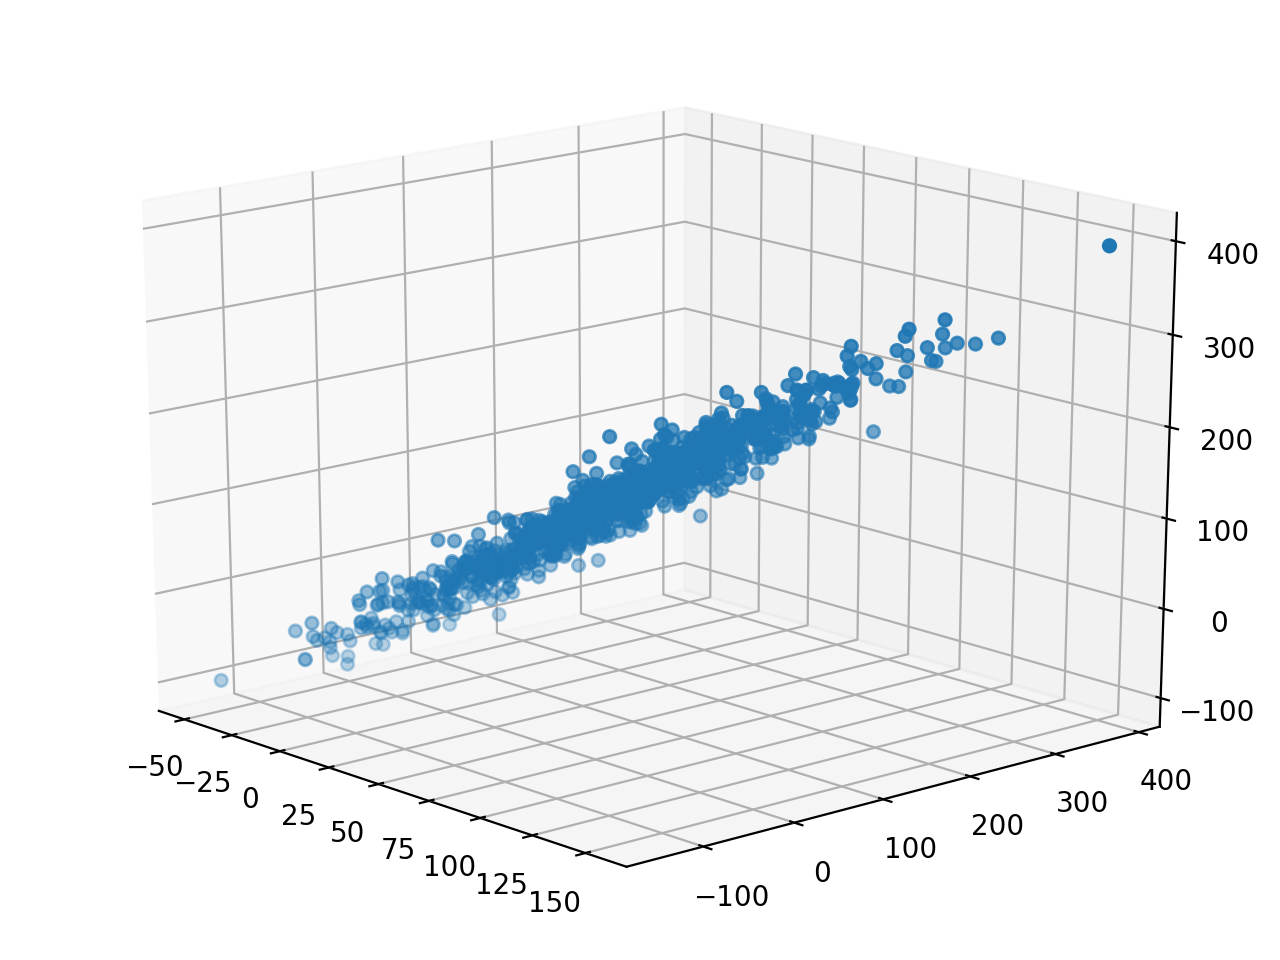

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x = plane_data[0,:][:].tolist()
y = plane_data[1,:][:].tolist()
z = plane_data[2,:][:].tolist()
ax.scatter(x,y,z)

plt.show()

In [7]:
## IMPLEMENT PCA ##

r = 2 # new dimensional space

# calculate the mean:
X = plane_data 
X_hat = np.mean(X,axis = 1)

X_centered = X
#subtract the mean from the matrix to get rid of the DC offset
for i in range(X.shape[1]):
    X_centered[:,i] = np.array([X[:,i]-X_hat])



#calcute the covariance matrix of the original X
Cov_X = (X@X.T)/X.shape[1]
#Cov_X.shape

# take the eigenvalues of the covariance matrix
eig_val,eig_vec = np.linalg.eig(Cov_X)

# find the 2 largest eigenvalues
eig_loc = np.argsort(eig_val)[::-1] #returns indexs of values in descending order
new_basis = eig_vec[:,eig_loc[:2]]

#project down into the lower dimension

Z = new_basis.T@X_centered




In [5]:
X_centered.shape

(3, 1001)

<IPython.core.display.Javascript object>


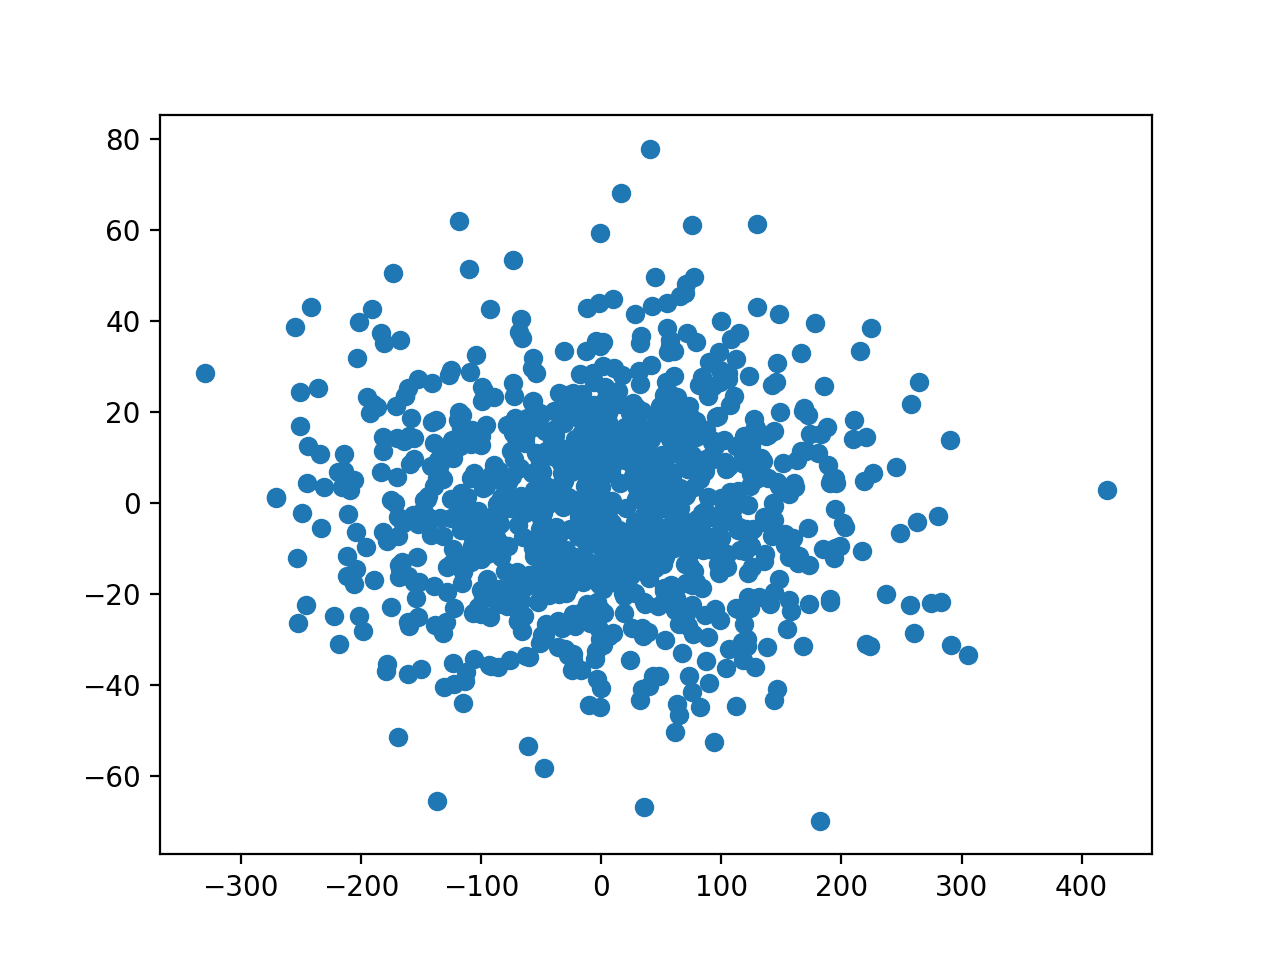

In [8]:
fig = plt.figure()
plt.scatter(Z[0,:],Z[1,:])
plt.show()